We want to isolate households with two parents living under civil union with children being over (or not) 21/25 yo.

In [1]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2019-01-31 15:06:43.212425


In [2]:
%matplotlib inline

In [3]:
secret = False #Will be put to True for a CASD export

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd ; pd.set_option("display.max_columns",200)
import pickle

In [5]:
import pickle
pickle_year_variable_path = "C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/year_variable/"
year =  pickle.load(open(pickle_year_variable_path+"year_variable.p",'rb')); print(year)

2011


In [6]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/edp_2016_final.h5'
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"
Store = pd.HDFStore(store_path)

In [7]:
Store.close()

In [8]:
fiscr = pd.read_hdf(result_path+"married_couples_step_1.h5", "fiscr")

In [9]:
fiscr.describe()

,AN_FISC_2011,AN_REVENU_2011,REG_2011,TU10_2011,NBFOYM_2011,NBPERSM_2011,INF14M_2011,SUP14M_2011,NBERAM_2011,NB_UC_2011,AGERF_2011,SEXERF_2011,OCCTYP_2011,TYPMEN9_2011,NB_ALLOC_CNAF_2011,NB_ALLOC_CNAV_2011,NB_ALLOC_MSAF_2011,NB_ALLOC_MSAV_2011,NIVVIEM_2011,CENTILE_2011,REVDISPM_2011,REVPERM_2011,REVINIM_2011,REVDECM_2011,ZTSAM_2011,ZSALM_2011,ZCHOM_2011,ZPERM_2011,ZRETM_2011,ZRSTM_2011,ZALRM_2011,ZRTOM_2011,ZRAGM_2011,ZRICM_2011,ZRNCM_2011,ZFONM_2011,ZVAMM0_2011,ZVAMM_2011,ZVALM0_2011,ZVALM_2011,ZRACM_2011,ZETRM_2011,ZALVM_2011,PSOCM_2011,PFAMM_2011,M_PNAM_2011,M_PAJEM_2011,M_CLCAM_2011,M_COLCAM_2011,M_AFM_2011,M_CFM_2011,M_ARSM_2011,M_AEEHM_2011,M_ASFM_2011,MINIM_2011,M_MINVM_2011,M_RSAM_2011,M_RSA_ACTM_2011,M_RSA_SOCM_2011,M_RSA_PFAM_2011,M_AAH_CAAHM_2011,LOGTM_2011,M_ALFM_2011,M_APLM_2011,M_ALSM_2011,M_ALSETM_2011,M_PPEM_2011,ZIMPOM_2011,ZIMPVALM_2011,ZTHABM_2011,CSGIM_2011,CSGISALM_2011,CRDSM_2011,CRDSSALM_2011,CSGPATM_2011,CSGVALM_2011,CSGIMPM_2011,CSGDM_2011,CSGDSALM_2011,PRODUITFIN_2011,ZPPEM_2011,ZQUOM_2011,ZDIVM_2011,ZGLOM_2011,ZAVFM_2011,ZIMPFORM_2011,NBPAC_2011,GARDEM_2011,SERVDOMM_2011,ZIMPOM_DECL_2011,ZIMPOM_ANC_2011,ZIMPOM_ANC_DECL_2011,ZAVFM_DECL_2011,ZTHABM_DECL_2011,AN_FISC_2014,AN_REVENU_2014,REG_2014,TU10_2014,NBFOYM_2014,NBPERSM_2014,INF14M_2014,SUP14M_2014,NBERAM_2014,NB_UC_2014,AGERF_2014,SEXERF_2014,OCCTYP_2014,TYPMEN9_2014,I_CHAMPM_2014,NB_ALLOC_CNAF_2014,NB_ALLOC_CNAV_2014,NB_ALLOC_MSAF_2014,NB_ALLOC_MSAV_2014,NIVVIEM_2014,CENTILE_2014,REVDISPM_2014,REVPERM_2014,REVINIM_2014,REVDECM_2014,ZTSAM_2014,ZSALM_2014,ZCHOM_2014,ZPERM_2014,ZRETM_2014,ZRSTM_2014,ZALRM_2014,ZRTOM_2014,ZRAGM_2014,ZRICM_2014,ZRNCM_2014,ZFONM_2014,ZVAMM0_2014,ZVAMM_2014,ZVALM0_2014,ZVALM_2014,ZRACM_2014,ZETRM_2014,ZALVM_2014,PSOCM_2014,PFAMM_2014,M_PNAM_2014,M_PAJEM_2014,M_CLCAM_2014,M_COLCAM_2014,M_AFM_2014,M_CFM_2014,M_ARSM_2014,M_AEEHM_2014,M_ASFM_2014,MINIM_2014,M_MINVM_2014,M_RSAM_2014,M_RSA_ACTM_2014,M_RSA_SOCM_2014,M_RSA_PFAM_2014,M_AAH_CAAHM_2014,LOGTM_2014,M_ALFM_2014,M_APLM_2014,M_ALSM_2014,M_ALSETM_2014,M_PPEM_2014,ZIMPOM_2014,ZIMPVALM_2014,ZTHABM_2014,CSGIM_2014,CSGISALM_2014,CRDSM_2014,CRDSSALM_2014,CSGPATM_2014,CSGVALM_2014,CSGIMPM_2014,CSGDM_2014,CSGDSALM_2014,PRODUITFIN_2014,ZPPEM_2014,ZQUOM_2014,ZDIVM_2014,ZGLOM_2014,ZAVFM_2014,ZIMPFORM_2014,NBPAC_2014,GARDEM_2014,SERVDOMM_2014,ZIMPOM_DECL_2014,ZIMPOM_ANC_2014,ZIMPOM_ANC_DECL_2014,ZAVFM_DECL_2014,ZTHABM_DECL_2014,index
count,790495.0,790495.0,790495.000000,790495.000000,790495.0,790495.000000,790495.000000,790495.000000,790495.0,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,780371.000000,780371.000000,780371.000000,780371.000000,7.803710e+05,780371.000000,7.803710e+05,7.803710e+05,7.803710e+05,7.803710e+05,7.904950e+05,7.904950e+05,790495.000000,7.904950e+05,7.904950e+05,7.904950e+05,790495.000000,790495.000000,7.904950e+05,7.904950e+05,7.904950e+05,7.803710e+05,7.803710e+05,7.803710e+05,7.803710e+05,7.803710e+05,7.803710e+05,7.904950e+05,790495.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.00000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,780371.000000,7.904950e+05,7.803710e+05,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,7.904950e+05,790495.000000,790495.000000,790495.000000,780371.000000,780371.000000,7.904950e+05,7.803710e+05,7.803710e+05,780371.000000,7.904950e+05,790495.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,790495.0,790495.0,790495.000000,790495.000000,790495.0,790495.000000,790495.000000,790495.000000,790495.0,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,790495.000000,7.803710e+05,780371.000000,7.803710e+05,7.803710e+05,7.803710e+05,7.904950e+05,7.904950e+05,7.904950e+05,790495.000000,790495.0

### Add individual variables

Here we are going to add individualized variables to the tax-household fiscr Database.

### Get parents individualized variables (age and `ID_DIFF` --individual unique identifier ) 

In [10]:
## FISC_REVDET contains individualized income in multiple categories (wage, retirement income, etc)
fisc_revdet_2011 = pd.read_hdf( store_path,"FISC_REVDET_{}".format(year+1) ); print(fisc_revdet_2011.shape)
fisc_revdet_2014 = pd.read_hdf( store_path,"FISC_REVDET_{}".format(2014+1) );print(fisc_revdet_2014.shape)

(5194667, 12)
(5418389, 12)


We have over 5 millions individuals income in the fiscal sources of the database each year.

#### We merge year 2011 individual income with year 2014 on a key unique to an individual.

In [11]:
fisc_revdet = pd.merge(fisc_revdet_2011, fisc_revdet_2014, on = [
    "ID_FISC_FOY_DIFF","ORDREFIP", "TYPE_FISC"], suffixes = ("_2011", "_2014"))
fisc_revdet.shape

(3260952, 21)

We loose 2 millions individuals that are not present both in 2011 and 2014.

#### Merge with FISC_INDIVIDU table

Sadly, there is no key to merge directly tax households data (`FISC_REVENU`) (containing income) on individualize tax income data `FISC_REVDET`.  
We thus have to use tax individual data `FISC_INDIVIDU` that do not contain income in order to have a unique key to merge `FISC_REVDET` with `FISC_REVENU`.

To develop a bit: 
 * `FISC_REVDET` contains the `ID_FISC_LOG_DIFF` that is a key unique to each **household** (reference unit in this study)
 * `FISC_INDIVIDU` that contains `"ID_FISC_FOY_DIFF","ORDREFIP", "TYPE_FISC"` keys unique for each individual, and `ID_FISC_LOG_DIFF`.
 * `FISC_REVENU` that contains `"ID_FISC_FOY_DIFF","ORDREFIP", "TYPE_FISC"` 
 
We thus have to merge the three tables in order to merge `FISC_REVDET` with `FISC_REVENU` (after doing some groupbys over households on the `FISC_REVDET` database ).

In [12]:
fisc_revdet.TYPE_FISC = fisc_revdet.TYPE_FISC.astype("str")

In [13]:
fisci = pd.read_hdf( store_path,"FISC_INDIVIDU_{}".format(2011+1))

In [14]:
fisci = pd.read_hdf( store_path,"FISC_INDIVIDU_{}".format(2011+1))
fisci = fisci[fisci.ID_FISC_LOG_DIFF.isin(fiscr.ID_FISC_LOG_DIFF)]

In [15]:
%%time
print(fisci.shape)
fisc_i_revdet = pd.merge(fisc_revdet, fisci, on=["ID_FISC_FOY_DIFF", "ORDREFIP", "TYPE_FISC"], 
                                 how = "right") #keep  all fisci obs, and only matching fisc_revdet keys
print(fisc_i_revdet.shape)

(2522873, 32)
(2522873, 50)
Wall time: 7.46 s


(0, 250000)

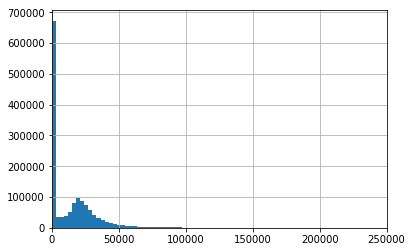

In [16]:
fisc_i_revdet.YSALI_2011.dropna().hist(bins = 1000); plt.xlim(0, 250_000)

In [17]:
fisci.shape

(2522873, 32)

In [18]:
df = fisc_i_revdet

In [19]:
## TODO check for duplicates (same NBPERS as line of obs)
df.sort_values("ID_FISC_LOG_DIFF").head()[:0]

,AN_FISC_2011,ID_FISC_FOY_DIFF,ORDREFIP,TYPE_FISC,REV_PRINC_2011,YSALI_2011,YCHOI_2011,YRSTI_2011,YALRI_2011,YRAGI_2011,YBICI_2011,YBNCI_2011,AN_FISC_2014,REV_PRINC_2014,YSALI_2014,YCHOI_2014,YRSTI_2014,YALRI_2014,YRAGI_2014,YBICI_2014,YBNCI_2014,ID_DIFF,AN_FISC,ID_FISC_LOG_DIFF,SEXE,JNAIS,MNAIS,ANAIS,CODNAIS,CIDECI,ZOXYZD,DACOED,T_CHARGE,CNCOIPV,CSDEP,CNE1,COM_NSCAT,COM_SCAT1,COM_SCAT2,I_FISC_LOGEMENT,I_FISC_REVENU,LIEN_FAMILIAL,NBPTR,I_FISC_DECES,TYPE_DECL,I_FISC_REVDET,TYPE_PRES,POIDS_FIDELI,ID_FISC_FOY_CONJ,ID_FISC_ADR_DIFF


In [20]:
df.columns[4:]

Index(['REV_PRINC_2011', 'YSALI_2011', 'YCHOI_2011', 'YRSTI_2011',
       'YALRI_2011', 'YRAGI_2011', 'YBICI_2011', 'YBNCI_2011', 'AN_FISC_2014',
       'REV_PRINC_2014', 'YSALI_2014', 'YCHOI_2014', 'YRSTI_2014',
       'YALRI_2014', 'YRAGI_2014', 'YBICI_2014', 'YBNCI_2014', 'ID_DIFF',
       'AN_FISC', 'ID_FISC_LOG_DIFF', 'SEXE', 'JNAIS', 'MNAIS', 'ANAIS',
       'CODNAIS', 'CIDECI', 'ZOXYZD', 'DACOED', 'T_CHARGE', 'CNCOIPV', 'CSDEP',
       'CNE1', 'COM_NSCAT', 'COM_SCAT1', 'COM_SCAT2', 'I_FISC_LOGEMENT',
       'I_FISC_REVENU', 'LIEN_FAMILIAL', 'NBPTR', 'I_FISC_DECES', 'TYPE_DECL',
       'I_FISC_REVDET', 'TYPE_PRES', 'POIDS_FIDELI', 'ID_FISC_FOY_CONJ',
       'ID_FISC_ADR_DIFF'],
      dtype='object')

In [21]:
individual_income_variables = ['REV_PRINC_2011', 'YSALI_2011', 'YCHOI_2011', 'YRSTI_2011',
       'YALRI_2011', 'YRAGI_2011', 'YBICI_2011', 'YBNCI_2011', 'AN_FISC_2014',
       'REV_PRINC_2014', 'YSALI_2014', 'YCHOI_2014', 'YRSTI_2014',
       'YALRI_2014', 'YRAGI_2014', 'YBICI_2014', 'YBNCI_2014',]

In [22]:
## Create a variable for the father and the mother for each individualized income
for col in individual_income_variables:
    df.loc[
        (df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 1)),"{}_father".format(col)
    ] = df[col]

    df.loc[
        (df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 2)),"{}_mother".format(col)
    ] = df[col]

In [ ]:
df.head()

In [24]:
parents_income_var = [col + "_{}".format(sex_parent) for col in individual_income_variables
                    for sex_parent in ["father", "mother"]]

In [25]:
df_grpby = df.groupby("ID_FISC_LOG_DIFF")[parents_income_var].sum()

In [26]:
df_grpby.YSALI_2011_father.isna().value_counts(dropna = False)

False    705556
True      84939
Name: YSALI_2011_father, dtype: int64

##### Age_mother, Age_father

In [27]:
df.loc[
          (df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 1)),
"Age_father"] = (2011 - df.ANAIS)

df.loc[
          (df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 2)),
"Age_mother"] = (2011 - df.ANAIS)

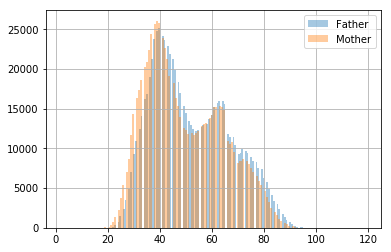

In [28]:
df.Age_father.dropna().hist(bins = 150, alpha = 0.4, label = "Father")
df.Age_mother.dropna().hist(bins = 150, alpha = 0.4,label = "Mother"); plt.legend()

In [29]:
df[(df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 1))].Age_father.isna().value_counts()

False    791117
Name: Age_father, dtype: int64

In [32]:
df[(df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 2))].YSALI_2011_mother.isna().value_counts()

False    705634
True      84242
Name: YSALI_2011_mother, dtype: int64

In [42]:
fisc_revdet.query("ID_FISC_FOY_DIFF == 1000222 ").head()

,AN_FISC_2011,ID_FISC_FOY_DIFF,ORDREFIP,TYPE_FISC,REV_PRINC_2011,YSALI_2011,YCHOI_2011,YRSTI_2011,YALRI_2011,YRAGI_2011,YBICI_2011,YBNCI_2011,AN_FISC_2014,REV_PRINC_2014,YSALI_2014,YCHOI_2014,YRSTI_2014,YALRI_2014,YRAGI_2014,YBICI_2014,YBNCI_2014
588965,2012,1000222,A,1,1,62581,0,0,0,0.0,0.0,0.0,2015,1,66647,0,0,0,0.0,0.0,0.0
588966,2012,1000222,A,2,1,28213,0,0,0,0.0,0.0,0.0,2015,1,30421,0,0,0,0.0,0.0,0.0
588967,2012,1000222,A,3,0,0,0,0,0,0.0,0.0,0.0,2015,0,0,0,0,0,0.0,0.0,0.0


In [40]:
fisci.query("ID_FISC_FOY_DIFF == 1000223 ")

,ID_DIFF,AN_FISC,ID_FISC_FOY_DIFF,ID_FISC_LOG_DIFF,ORDREFIP,TYPE_FISC,SEXE,JNAIS,MNAIS,ANAIS,CODNAIS,CIDECI,ZOXYZD,DACOED,T_CHARGE,CNCOIPV,CSDEP,CNE1,COM_NSCAT,COM_SCAT1,COM_SCAT2,I_FISC_LOGEMENT,I_FISC_REVENU,LIEN_FAMILIAL,NBPTR,I_FISC_DECES,TYPE_DECL,I_FISC_REVDET,TYPE_PRES,POIDS_FIDELI,ID_FISC_FOY_CONJ,ID_FISC_ADR_DIFF
333,NaN,2012,1000223,2481117.0,B,1,1.0,4.0,12.0,1965.0,33522,M,X,12072003.0,NaN,NaN,33,122,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,1,0,0.000000,NaN,412777
334,NaN,2012,1000223,2481117.0,B,2,2.0,1.0,11.0,1967.0,33063,M,X,12072003.0,NaN,NaN,33,122,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,1,0,0.000000,NaN,412777
335,931696.0,2012,1000223,2481117.0,B,A,NaN,NaN,NaN,2000.0,NaN,A,NaN,NaN,F,NaN,33,122,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,0,1,33.602924,NaN,412777


In [ ]:
df[(df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 2))][df[(df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 2))].YSALI_2014_mother.isna()]

#### ID_DIFF father mother

In [36]:
df.loc[
          (df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 1)),
"ID_DIFF_father"] = df.ID_DIFF

df.loc[
          (df.TYPE_FISC.isin(["1","2"]) & (df.SEXE == 2)),
"ID_DIFF_mother"] = df.ID_DIFF

In [ ]:
fisci_to_merge = df[["Age_father", "Age_mother",
                     "ID_DIFF_father","ID_DIFF_mother",
                     "ID_FISC_LOG_DIFF"]
                   + parents_income_var ].groupby("ID_FISC_LOG_DIFF").first()
fisci_to_merge.head()

In [38]:
fisci_to_merge.Age_mother.isnull().value_counts()

False    788906
True       1589
Name: Age_mother, dtype: int64

In [39]:
fisci_to_merge.Age_father.isnull().value_counts()

False    789612
True        883
Name: Age_father, dtype: int64

In [32]:
merge = pd.merge(fiscr, 
                 fisci_to_merge.reset_index(), 
                 on = "ID_FISC_LOG_DIFF")

In [33]:
fiscr.shape

(790495, 202)

In [34]:
merge.shape

(790495, 240)

In [35]:
fiscr = merge

In [36]:
del(fisci, fisci_to_merge)

In [37]:
fiscr[fiscr.YSALI_2011_father.isnull()| fiscr.YSALI_2014_father.isnull()].shape

(84939, 240)

We have 66231 fiscal-households over 707395 (9.3%)  for which we did not have the fiscal-households individualized income.


\# TODO: Find why

In [38]:
fiscr["No_individual_income"] = fiscr.YSALI_2011_father.isnull()


### Age children

In [39]:
fisc_individu_2011 = pd.read_hdf( store_path,"FISC_INDIVIDU_{}".format(2011+1) )

In [40]:
fisci_select = fisc_individu_2011[fisc_individu_2011.TYPE_FISC.isin(["3",'4','5','6','A','B','C','D','E', 'F'])]

In [41]:
fisci_select["Age_enfant"] = 2011-fisci_select.ANAIS

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
grpby_fisci = fisci_select[["ID_FISC_LOG_DIFF","Age_enfant"]].groupby("ID_FISC_LOG_DIFF")

In [43]:
df_grpby_fisci = pd.DataFrame()
df_grpby_fisci["Age_eldest_child"] = grpby_fisci.Age_enfant.max()
df_grpby_fisci["Age_youngest_child"] = grpby_fisci.Age_enfant.min()
df_grpby_fisci["Age_child_mean"] = grpby_fisci.Age_enfant.mean()



In [44]:
merge = pd.merge(fiscr, df_grpby_fisci.reset_index(),on = "ID_FISC_LOG_DIFF", how = "left") 

In [45]:
fiscr = merge

## Checks

### Number of dependent child is the same in fisci and in fiscr

In [46]:
fisc_individu_2011 = pd.read_hdf( store_path,"FISC_INDIVIDU_{}".format(2011+1) )
fisc_individu_2014 = pd.read_hdf( store_path,"FISC_INDIVIDU_{}".format(2014+1) )

In [47]:
%%time
### Keep only observations still in the database
fisc_individu_2011 = fisc_individu_2011[fisc_individu_2011.ID_FISC_LOG_DIFF.isin(
   fiscr.ID_FISC_LOG_DIFF.values)]
fisc_individu_2014 = fisc_individu_2014[fisc_individu_2014.ID_FISC_LOG_DIFF.isin(
   fiscr.ID_FISC_LOG_DIFF.values)]
#fisc_individu_2014 = fisc_individu_2014[fisc_individu_2014.isin(fiscr.ID_FISC_LOG_DIFF)]

Wall time: 7.42 s


In [48]:
dependent_values_list = ["3",'4','5','6','A','B','C','D','E', 'F']

In [49]:
fisc_individu_2011["Dependent"] = fisc_individu_2011.TYPE_FISC.isin(
    dependent_values_list)
fisc_individu_2014["Dependent"] = fisc_individu_2014.TYPE_FISC.isin(
   dependent_values_list)    

In [50]:
grpby_2011 = fisc_individu_2011[["ID_FISC_LOG_DIFF","Dependent"]].groupby("ID_FISC_LOG_DIFF")
grpby_2014 = fisc_individu_2014[["ID_FISC_LOG_DIFF","Dependent"]].groupby("ID_FISC_LOG_DIFF")

grpby_fisci_2011 = pd.DataFrame()
grpby_fisci_2011["Nb_dependent"] = grpby_2011["Dependent"].sum()
grpby_fisci_2011["Nb_pers_household"] =  grpby_2011["Dependent"].count()

grpby_fisci_2014 = pd.DataFrame()
grpby_fisci_2014["Nb_dependent"] = grpby_2014["Dependent"].sum()
grpby_fisci_2014["Nb_pers_household"] =  grpby_2014["Dependent"].count()

In [51]:
merge = pd.merge(fiscr, grpby_fisci_2011.reset_index(), on = "ID_FISC_LOG_DIFF")
merge = pd.merge(merge, grpby_fisci_2014.reset_index(), on = "ID_FISC_LOG_DIFF", 
                 suffixes = ("_2011","_2014"))

In [52]:
merge.Nb_dependent_2011.fillna(0, inplace = True)
merge.Nb_dependent_2014.fillna(0, inplace = True)

In [53]:
(merge.Nb_dependent_2011 == merge.NBPAC_2011).value_counts() ## 74 households that we drop TODO : find why ?

True     790421
False        74
dtype: int64

In [54]:
(merge.Nb_dependent_2014 == merge.NBPAC_2014).value_counts() ## 

True     790486
False         9
dtype: int64

In [55]:
merge.shape

(790495, 248)

In [56]:
merge = merge.query("(Nb_dependent_2014==NBPAC_2014) & (Nb_dependent_2011==NBPAC_2011)")

In [57]:
merge.shape

(790413, 248)

In [58]:
assert np.all(merge.Nb_pers_household_2011 == merge.NBPERSM_2011)
assert np.all(merge.Nb_pers_household_2014 == merge.NBPERSM_2014)

In [59]:
merge.shape

(790413, 248)

In [60]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [61]:
fiscr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790495 entries, 0 to 790494
Columns: 244 entries, ID_FISC_LOG_DIFF to Age_child_mean
dtypes: bool(1), float64(115), int64(116), object(12)
memory usage: 1.4+ GB


In [62]:
fiscr.to_hdf(result_path+"married_couples_step_2.h5", "fiscr")

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->['ID_FISC_LOG_DIFF', 'DEP_2011', 'DEPCOM_2011', 'I_CHAMPM_2011', 'I_PAUVRE50M_2011', 'I_PAUVRE60M_2011', 'DEP_2014', 'DEPCOM_2014', 'I_PAUVRE50M_2014', 'I_PAUVRE60M_2014', 'TYPE_FISC_2011', 'TYPE_FISC_2014']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [63]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)

now:  2018-11-30 16:56:02.815762
execution_time:  0:04:26.743650
